In [56]:
import numpy as np
import pandas as pd
import re
from optimization import *
from oracles import *

In [67]:
train = pd.read_csv('./toxic_train.csv')
test = pd.read_csv('./toxic_test.csv')

In [68]:
train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,Explanation\nWhy the edits made under my usern...,False
1,1,D'aww! He matches this background colour I'm s...,False
2,2,"Hey man, I'm really not trying to edit war. It...",False
3,3,"""\nMore\nI can't make any real suggestions on ...",False
4,4,"You, sir, are my hero. Any chance you remember...",False


In [69]:
def split_target(X):
    y = X['is_toxic']*2 - 1
    X = X.drop(columns=["is_toxic"])
    return X, y

def transform(X):
    X['comment_text'] = X.apply(lambda x: re.sub('[^0-9a-zA-Z]+', ' ', x.comment_text), axis=1)
    X['comment_text'] = X['comment_text'].str.lower().str.strip()

In [70]:
train, y_train = split_target(train)
test, y_test = split_target(test)
train

,Unnamed: 0,comment_text
0,0,Explanation\nWhy the edits made under my usern...
1,1,D'aww! He matches this background colour I'm s...
2,2,"Hey man, I'm really not trying to edit war. It..."
3,3,"""\nMore\nI can't make any real suggestions on ..."
4,4,"You, sir, are my hero. Any chance you remember..."
...,...,...
52056,159494,"""\n\n our previous conversation \n\nyou fuckin..."
52057,159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR
52058,159541,Your absurd edits \n\nYour absurd edits on gre...
52059,159546,"""\n\nHey listen don't you ever!!!! Delete my e..."


In [73]:
transform(train)
transform(test)
train

,Unnamed: 0,comment_text
0,0,explanation why the edits made under my userna...
1,1,d aww he matches this background colour i m se...
2,2,hey man i m really not trying to edit war it s...
3,3,more i can t make any real suggestions on impr...
4,4,you sir are my hero any chance you remember wh...
...,...,...
52056,159494,our previous conversation you fucking shit eat...
52057,159514,you are a mischievious pubic hair
52058,159541,your absurd edits your absurd edits on great w...
52059,159546,hey listen don t you ever delete my edits ever...


In [7]:
import scipy
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
count_vec = CountVectorizer(min_df=1e-3)

X_train = count_vec.fit_transform(train['comment_text'])
X_test = count_vec.transform(test['comment_text'])

In [63]:
X_train

<52061x3736 sparse matrix of type '<class 'numpy.int64'>'
	with 1795438 stored elements in Compressed Sparse Row format>

In [64]:
w0_train = csr_matrix(np.ones(X_train.shape[0])).T
w0_test = csr_matrix(np.ones(X_test.shape[0])).T

X_train = hstack((X_train, w0_train))
X_test = hstack((X_test, w0_test))
X_train

<52061x3737 sparse matrix of type '<class 'numpy.float64'>'
	with 1847499 stored elements in COOrdinate format>

In [65]:
from sklearn.model_selection import train_test_split
X_train_tr, X_val, y_train_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=10)

## Экспериметы

In [23]:
import time

In [ ]:
step_alpha = np.arange(0.1, 1, 0.1)
for alpha in step_alpha:
  start_time = time.time()
  model = GDClassifier(loss_function='binary_logistic', step_alpha=alpha,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
  model.fit(X_train_tr, y_train_tr, trace=False)
  y_pred = model.predict(X_val)
  accuracy = np.mean(y_val.values == y_pred)
  print(f'step_alpha: {alpha} step_beta: {0.2} accuracy: {accuracy} time: {time.time() - start_time}')

step_alpha: 0.1 step_beta: 0.2 accuracy: 0.8162494397848774 time: 12.95927119255066
step_alpha: 0.2 step_beta: 0.2 accuracy: 0.8353287662462385 time: 13.093015909194946
step_alpha: 0.30000000000000004 step_beta: 0.2 accuracy: 0.8457007490876497 time: 12.85243821144104
step_alpha: 0.4 step_beta: 0.2 accuracy: 0.8527434534861387 time: 12.232337236404419
step_alpha: 0.5 step_beta: 0.2 accuracy: 0.8580574940777258 time: 13.839577913284302
step_alpha: 0.6 step_beta: 0.2 accuracy: 0.861706895447852 time: 13.141149759292603
step_alpha: 0.7000000000000001 step_beta: 0.2 accuracy: 0.8642038542800435 time: 13.306637048721313
step_alpha: 0.8 step_beta: 0.2 accuracy: 0.8677252064792881 time: 12.506350040435791
step_alpha: 0.9 step_beta: 0.2 accuracy: 0.8711825340930918 time: 12.498167276382446


In [ ]:
step_beta = np.arange(0.0, 5, 0.2)
for beta in step_beta:
  start_time = time.time()
  model = GDClassifier(loss_function='binary_logistic', step_alpha=1.0,
                    step_beta=beta, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
  model.fit(X_train_tr, y_train_tr, trace=False)
  y_pred = model.predict(X_val)
  accuracy = np.mean(y_val.values == y_pred)
  print(f'step_alpha: {1.0} step_beta: {beta} accuracy: {accuracy} time: {time.time() - start_time}')

step_alpha: 1.0 step_beta: 0.0 accuracy: 0.871251692783904 time: 28.99286723136902
step_alpha: 1.0 step_beta: 0.2 accuracy: 0.848906945250532 time: 28.990046501159668
step_alpha: 1.0 step_beta: 0.4 accuracy: 0.8197426968465854 time: 29.04265809059143
step_alpha: 1.0 step_beta: 0.6000000000000001 accuracy: 0.7885471077577868 time: 29.07394242286682
step_alpha: 1.0 step_beta: 0.8 accuracy: 0.7717643644805572 time: 29.09982681274414
step_alpha: 1.0 step_beta: 1.0 accuracy: 0.7693944670148964 time: 29.169070959091187
step_alpha: 1.0 step_beta: 1.2000000000000002 accuracy: 0.754256142387309 time: 29.176034688949585
step_alpha: 1.0 step_beta: 1.4000000000000001 accuracy: 0.7484039466047592 time: 29.35334277153015
step_alpha: 1.0 step_beta: 1.6 accuracy: 0.7470980847359258 time: 29.20875120162964
step_alpha: 1.0 step_beta: 1.8 accuracy: 0.7440510737086478 time: 28.86230707168579
step_alpha: 1.0 step_beta: 2.0 accuracy: 0.7361675372412458 time: 28.94241428375244
step_alpha: 1.0 step_beta: 2.2 

In [ ]:
step_alpha = np.arange(0.1, 10, 0.5)
step_beta = np.arange(0, 2.4, 0.2)

accuracy_res = {}
time_res = {}

for alpha in step_alpha:
    for beta in step_beta:
        start_time = time.time()
        model = GDClassifier(loss_function='binary_logistic', step_alpha=alpha,
                    step_beta=beta, tolerance=1e-6, max_iter=1000, l2_coef=0.0)
        model.fit(X_train_tr, y_train_tr, trace=False)
        y_pred = model.predict(X_val)
        accuracy = np.mean(y_val.values == y_pred)
        accuracy_res[(alpha, beta)] = accuracy
        time_res[(alpha, beta)] = time.time() - start_time
        print(f'step_alpha: {alpha} step_beta: {beta} accuracy: {accuracy} time: {time.time() - start_time}')

step_alpha: 0.1 step_beta: 0.0 accuracy: 0.8473653883091107 time: 13.49005675315857
step_alpha: 0.1 step_beta: 0.2 accuracy: 0.8162494397848774 time: 13.08144736289978
step_alpha: 0.1 step_beta: 0.4 accuracy: 0.7936487611242717 time: 12.701650619506836
step_alpha: 0.1 step_beta: 0.6000000000000001 accuracy: 0.7857097125296114 time: 13.124553918838501
step_alpha: 0.1 step_beta: 0.8 accuracy: 0.7724566233433638 time: 13.49487042427063
step_alpha: 0.1 step_beta: 1.0 accuracy: 0.7576669441065369 time: 13.148473978042603
step_alpha: 0.1 step_beta: 1.2000000000000002 accuracy: 0.7426211665279467 time: 12.765364408493042
step_alpha: 0.1 step_beta: 1.4000000000000001 accuracy: 0.7262948972405404 time: 6.818907022476196
step_alpha: 0.1 step_beta: 1.6 accuracy: 0.7132338818106153 time: 3.681669235229492
step_alpha: 0.1 step_beta: 1.8 accuracy: 0.7056789807285998 time: 2.0950262546539307
step_alpha: 0.1 step_beta: 2.0 accuracy: 0.7010051859914207 time: 1.2039246559143066
step_alpha: 0.1 step_beta

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
def plot_mean_params(dict_res, ylabel):
    mean_res_a = []
    for alpha in step_alpha:
        res = []
        for key in dict_res.keys():
            if abs(key[0] - alpha) < 1e-3:
                res += [dict_res[key]]
        mean_res_a += [np.mean(res)]
    
    mean_res_b = []
    for beta in step_beta:
        res = []
        for key in dict_res.keys():
            if abs(key[1] - beta) < 1e-3:
                res += [dict_res[key]]
        mean_res_b += [np.mean(res)]
    
    plt.figure(figsize=(7.5, 4)) 
    
    plt.title('Зависимость метрики качества от параметров alpha и beta', fontsize = 13)
    plt.plot(step_alpha, mean_res_a, color = 'indigo', label='alpha')
    plt.plot(step_beta, mean_res_b, color = 'red', label='beta')
    plt.grid(True)
    plt.ylabel(ylabel, fontsize = 13)
    plt.xlabel('Value parameters', fontsize = 13)
    plt.xticks(step_alpha)
    plt.legend(fontsize=13)
    

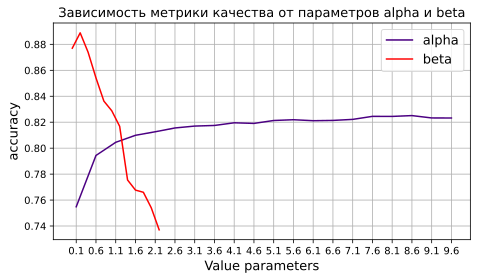

In [ ]:
plot_mean_params(accuracy_res, 'accuracy')
plt.savefig('alpha_beta_acc.pdf')

In [ ]:
best_res_cv = sorted(accuracy_res.values(), reverse=True)[:3]
best_res_cv

[0.9036429989115821, 0.9012100646648313, 0.9005698188104232]

In [ ]:
worst_res_cv = sorted(accuracy_res.values())[:3]
worst_res_cv

[0.6961393174979192, 0.7010051859914207, 0.7056789807285998]

In [ ]:
def get_key(d, values):
    keys = []
    for val in values:
        for key in d.keys():
            if abs(d[key] - val) < 1e-6:
                keys += [key]
    return keys

best_alpha_beta = get_key(accuracy_res, best_res_cv)
best_alpha_beta

[(7.6, 0.2), (7.1, 0.2), (8.6, 0.2)]

In [ ]:
worst_alpha_beta = get_key(accuracy_res, worst_res_cv)
worst_alpha_beta

[(0.1, 2.2), (0.1, 2.0), (0.1, 1.8)]

In [ ]:
def plot_loss_iter(histories, color, alpha, beta=None, x=None, y=None):
    plt.figure(figsize=(7,3.5)) 
    plt.title('Зависимость функции потерь от итерации', fontsize = 13)
    if len(histories) == 1:
        history = histories[0]
        
        plt.plot(range(1, len(history['func'])), history['func'][1:], color = color)
        
        plt.text (x, y[0], alpha)
        plt.text (x, y[1], beta)
    else:
        for i in range(len(histories)):
            plt.plot(range(1, len(histories[i]['func'])), histories[i]['func'][1:], color = color[i], label=alpha[i])
            plt.legend(fontsize=13)
    
    plt.grid(True)
    plt.ylabel('Loss', fontsize = 13)
    plt.xlabel('Number of iter', fontsize = 13)

In [ ]:
def plot_loss_time(histories, color, alpha, beta=None, x=None, y=None):
    plt.figure(figsize=(7, 3.5))
    plt.title('Зависимость функции потерь от времени работы', fontsize = 13)
    
    if len(histories) == 1:
        history = histories[0]
        time = np.array(history['time']).cumsum()
        plt.plot(time, history['func'], color = color)
        
        plt.text (x, y[0], alpha)
        plt.text (x, y[1], beta)
    else:
        for i in range(len(histories)):
            time = np.array(histories[i]['time']).cumsum()
            plt.plot(time, histories[i]['func'], color = color[i], label=alpha[i])
            plt.legend(fontsize=13)
    
    plt.grid(True)
    plt.ylabel('Loss', fontsize = 13)
    plt.xlabel('Time, sec', fontsize = 13)

In [ ]:
def plot_accuracy_iter(histories, color, alpha, beta=None, x=None, y=None):
    plt.figure(figsize=(7, 3.5))
    plt.title('Зависимость точности от итерации', fontsize = 13)
    
    if len(histories) == 1:
        history = histories[0]
        plt.plot(range(1, len(history['accuracy']) - 1), history['accuracy'][2:], color = color)
        plt.text (x, y[0], alpha)
        plt.text (x, y[1], beta)
    else:
        for i in range(len(histories)):
            plt.plot(range(1, len(histories[i]['accuracy']) - 1), histories[i]['accuracy'][2:], color = color[i], label=alpha[i])
            plt.legend(fontsize=13)
    plt.grid(True)
    plt.ylabel('Accuracy', fontsize = 13)
    plt.xlabel('Number of iter', fontsize = 13)

In [ ]:
def plot_accuracy_time(histories, color, alpha, beta=None, x=None, y=None):
    plt.figure(figsize=(7, 3.5)) 
    plt.title('Зависимость точности от времени работы', fontsize = 13)
    
    if len(histories) == 1:
        history = histories[0]
        time = np.array(history['time']).cumsum()
        plt.plot(time, history['accuracy'], color = color)
        plt.text (x, y[0], alpha)
        plt.text (x, y[1], beta)
    else:
        for i in range(len(histories)):
            time = np.array(histories[i]['time']).cumsum()
            plt.plot(time, histories[i]['accuracy'], color = color[i], label=alpha[i])
            plt.legend(fontsize=13)
    plt.grid(True)
    plt.ylabel('Accuracy', fontsize = 13)
    plt.xlabel('Time, sec', fontsize = 13)

In [ ]:
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-6, max_iter=1000, l2_coef=0.0)
history1 = model.fit(X_train_tr, y_train_tr, trace=True)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.9036429989115821

In [ ]:
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.0, tolerance=1e-6, max_iter=1000, l2_coef=0.0)
history2 = model.fit(X_train_tr, y_train_tr, trace=True)
y_pred = model.predict(X_test)
np.mean(y_test.values == y_pred)

0.880586186883343

In [ ]:
model = GDClassifier(loss_function='binary_logistic', step_alpha=4.1,
                    step_beta=0.0, tolerance=1e-6, max_iter=1000, l2_coef=0.0)
history3 = model.fit(X_train_tr, y_train_tr, trace=True)
y_pred = model.predict(X_test)
np.mean(y_test.values == y_pred)

0.8804410911201392

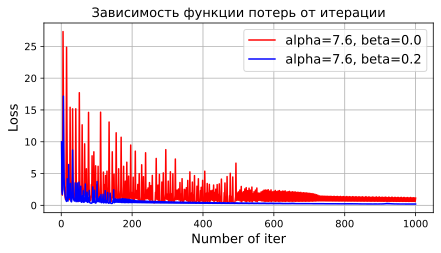

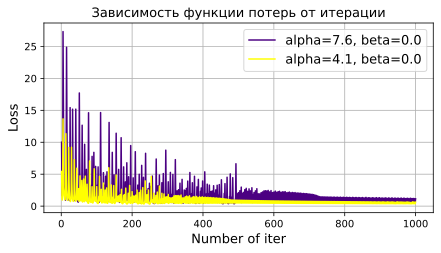

In [ ]:
plot_loss_iter([history2, history1], ['red', 'blue'], ['alpha=7.6, beta=0.0', 'alpha=7.6, beta=0.2'])
plt.savefig('gd_loss_iter_beta.pdf')
plot_loss_iter([history2, history3], ['indigo', 'yellow'], ['alpha=7.6, beta=0.0', 'alpha=4.1, beta=0.0'])
plt.savefig('gd_loss_iter_alpha.pdf')

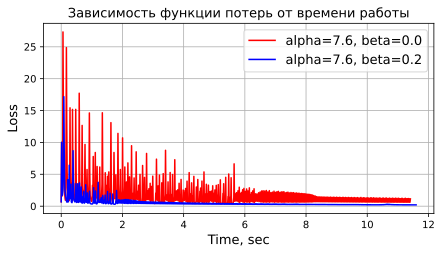

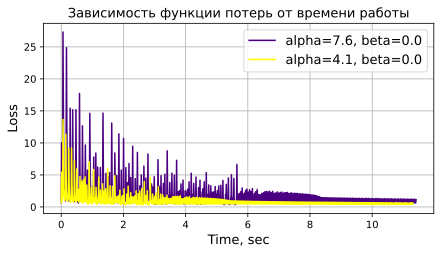

In [ ]:
plot_loss_time([history2, history1], ['red', 'blue'], ['alpha=7.6, beta=0.0', 'alpha=7.6, beta=0.2'])
plt.savefig('gd_loss_time_beta.pdf')
plot_loss_time([history2, history3], ['indigo', 'yellow'], ['alpha=7.6, beta=0.0', 'alpha=4.1, beta=0.0'])
plt.savefig('gd_loss_time_alpha.pdf')

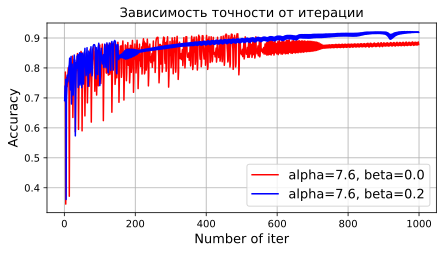

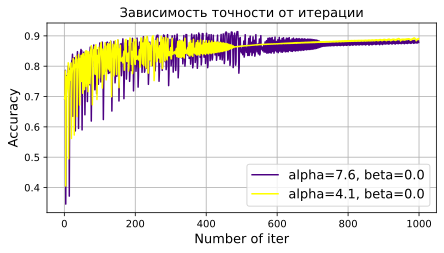

In [ ]:
plot_accuracy_iter([history2, history1], ['red', 'blue'], ['alpha=7.6, beta=0.0', 'alpha=7.6, beta=0.2'])
plt.savefig('gd_accuracy_iter_beta.pdf')
plot_accuracy_iter([history2, history3], ['indigo', 'yellow'], ['alpha=7.6, beta=0.0', 'alpha=4.1, beta=0.0'])
plt.savefig('gd_accuracy_iter_alpha.pdf')

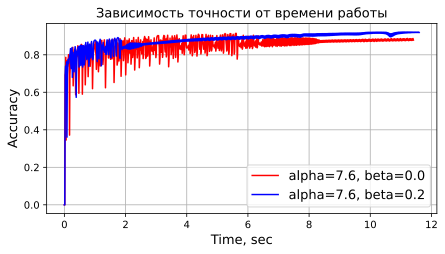

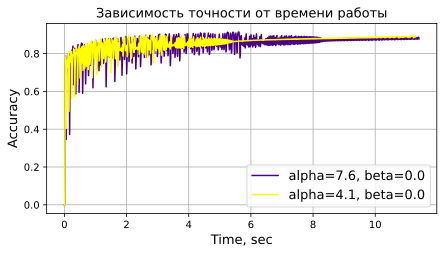

In [ ]:
plot_accuracy_time([history2, history1], ['red', 'blue'], ['alpha=7.6, beta=0.0', 'alpha=7.6, beta=0.2'])
plt.savefig('gd_accuracy_time_beta.pdf')
plot_accuracy_time([history2, history3], ['indigo', 'yellow'], ['alpha=7.6, beta=0.0', 'alpha=4.1, beta=0.0'])
plt.savefig('gd_accuracy_time_alpha.pdf')

In [ ]:
w_unif = 2*np.random.random(X_train.shape[1]) - 1
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-6, max_iter=1000, l2_coef=0.0)
history4 = model.fit(X_train_tr, y_train_tr, w_0=w_unif, trace=True)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.887892950893143

In [ ]:
w_norm = 2*np.random.randn(X_train.shape[1])
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-6, max_iter=1000, l2_coef=0.0)
history5 = model.fit(X_train_tr, y_train_tr, w_0=w_norm, trace=True)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.8414751264485563

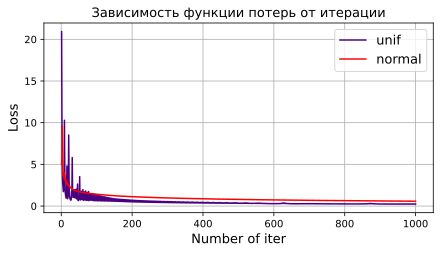

In [ ]:
plot_loss_iter([history4, history5], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('loss_iter_unif.pdf')

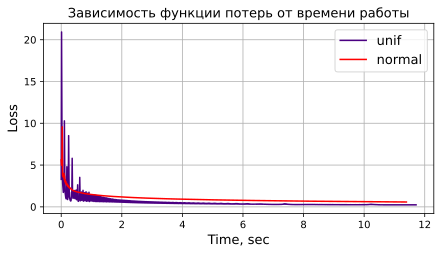

In [ ]:
plot_loss_time([history4, history5], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('loss_time_unif.pdf')

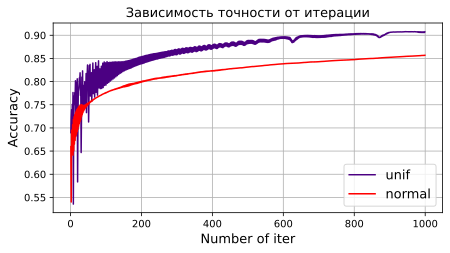

In [ ]:
plot_accuracy_iter([history4, history5], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('accuracy_iter_unif.pdf')

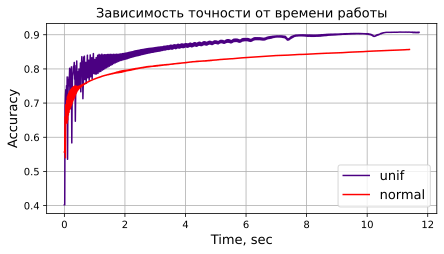

In [ ]:
plot_accuracy_time([history4, history5], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('accuracy_time_unif.pdf')

## SGD

In [ ]:
step_alpha = np.arange(0.1, 10, 0.5)
step_beta = np.arange(0, 2.4, 0.2)

accuracy_res = {}
time_res = {}

for alpha in step_alpha:
    for beta in step_beta:
        start_time = time.time()
        model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=alpha,
                    step_beta=beta, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
        model.fit(X_train, y_train.values, trace=False)
        y_pred = model.predict(X_val)
        accuracy = np.mean(y_val.values == y_pred)
        accuracy_res[(alpha, beta)] = accuracy
        time_res[(alpha, beta)] = time.time() - start_time
        print(f'step_alpha: {alpha} step_beta: {beta} accuracy: {accuracy} time: {time.time() - start_time}')

step_alpha: 0.1 step_beta: 0.0 accuracy: 0.8417952493757603 time: 4.6740381717681885
step_alpha: 0.1 step_beta: 0.2 accuracy: 0.8154811447595877 time: 4.749238967895508
step_alpha: 0.1 step_beta: 0.4 accuracy: 0.7935847365388309 time: 4.7084174156188965
step_alpha: 0.1 step_beta: 0.6000000000000001 accuracy: 0.7870542288238683 time: 4.237926006317139
step_alpha: 0.1 step_beta: 0.8 accuracy: 0.7666303860682502 time: 2.377279043197632
step_alpha: 0.1 step_beta: 1.0 accuracy: 0.7538254689800884 time: 4.62633204460144
step_alpha: 0.1 step_beta: 1.2000000000000002 accuracy: 0.7300083231961073 time: 2.162140130996704
step_alpha: 0.1 step_beta: 1.4000000000000001 accuracy: 0.7082399641462321 time: 2.0520739555358887
step_alpha: 0.1 step_beta: 1.6 accuracy: 0.6953069978871886 time: 0.4396326541900635
step_alpha: 0.1 step_beta: 1.8 accuracy: 0.6910813752480953 time: 1.3740689754486084
step_alpha: 0.1 step_beta: 2.0 accuracy: 0.6896088097829567 time: 0.5718810558319092
step_alpha: 0.1 step_beta:

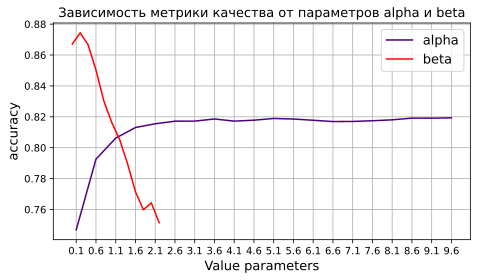

In [ ]:
plot_mean_params(accuracy_res, 'accuracy')
plt.savefig('sgd_alpha_beta_acc.pdf')

In [ ]:
best_res_cv = sorted(accuracy_res.values(), reverse=True)[:5]
best_res_cv

[0.8826429348869966,
 0.8816825661053844,
 0.8814904923490621,
 0.8812343940072987,
 0.8811063448364171]

In [ ]:
def get_key(d, values):
    keys = []
    for val in values:
        for key in d.keys():
            if abs(d[key] - val) < 1e-6:
                keys += [key]
    return keys

best_alpha_beta = get_key(accuracy_res, best_res_cv)
best_alpha_beta

[(3.6, 0.2), (4.1, 0.2), (2.6, 0.2), (8.1, 0.2), (3.1, 0.2)]

In [ ]:
def plot_sgd_loss_iter(histories, color, alpha, beta=None, x=None, y=None):
    plt.figure(figsize=(7,3.5)) 
    plt.title('Зависимость функции потерь от приближённой эпохи', fontsize = 13)
    if len(histories) == 1:
        history = histories[0]
        
        plt.plot(history['epoch_num'], history['func'], color = color)
        
        plt.text (x, y[0], alpha)
        plt.text (x, y[1], beta)
    else:
        for i in range(len(histories)):
            plt.plot(histories[i]['epoch_num'], histories[i]['func'], color = color[i], label=alpha[i])
            plt.legend(fontsize=13)
    
    plt.grid(True)
    plt.ylabel('Loss', fontsize = 13)
    plt.xlabel('Number of epoch_num', fontsize = 13)

In [ ]:
def plot_sgd_accuracy_iter(histories, color, alpha, beta=None, x=None, y=None):
    plt.figure(figsize=(7, 3.5))
    plt.title('Зависимость точности от приближённой эпохи', fontsize = 13)
    
    if len(histories) == 1:
        history = histories[0]
        plt.plot(history['epoch_num'], history['accuracy'], color = color)
        plt.text (x, y[0], alpha)
        plt.text (x, y[1], beta)
    else:
        for i in range(len(histories)):
            plt.plot(histories[i]['epoch_num'], histories[i]['accuracy'], color = color[i], label=alpha[i])
            plt.legend(fontsize=13)
    plt.grid(True)
    plt.ylabel('Accuracy', fontsize = 13)
    plt.xlabel('Number of epoch_num', fontsize = 13)

In [ ]:
model = SGDClassifier(loss_function='binary_logistic', batch_size = 5000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history7 = model.fit(X_train, y_train.values, trace=True, log_freq=0.1)

In [ ]:
model = SGDClassifier(loss_function='binary_logistic', batch_size = 5000, step_alpha=3.6,
                    step_beta=0.0, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history8 = model.fit(X_train, y_train.values, trace=True, log_freq=0.1)

In [ ]:
model = SGDClassifier(loss_function='binary_logistic', batch_size = 5000, step_alpha=8.1,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history9 = model.fit(X_train, y_train.values, trace=True, log_freq=0.1)

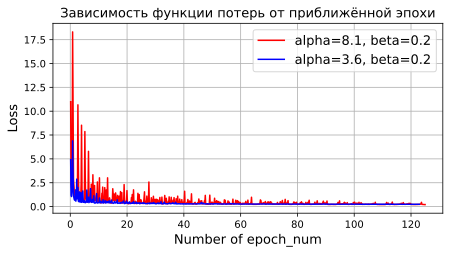

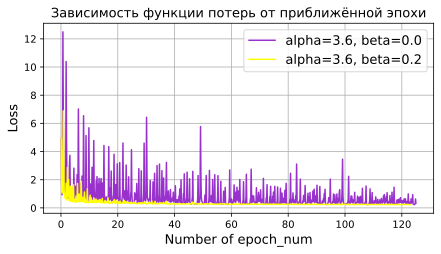

In [ ]:
plot_sgd_loss_iter([history9, history7], ['red', 'blue'], ['alpha=8.1, beta=0.2', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_loss_iter_alpha.pdf')
plot_sgd_loss_iter([history8, history7], ['darkorchid', 'yellow'], ['alpha=3.6, beta=0.0', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_loss_iter_beta.pdf')

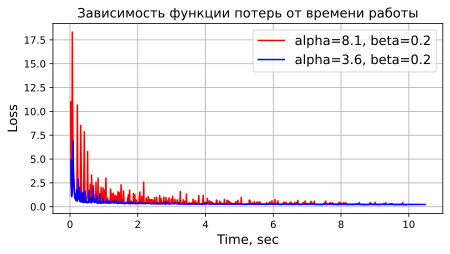

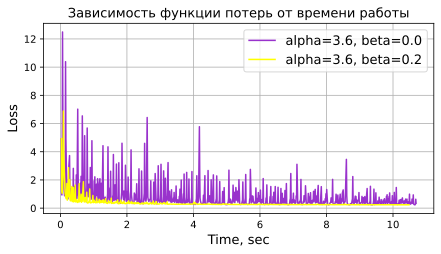

In [ ]:
plot_loss_time([history9, history7], ['red', 'blue'], ['alpha=8.1, beta=0.2', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_loss_time_alpha.pdf')
plot_loss_time([history8, history7], ['darkorchid', 'yellow'], ['alpha=3.6, beta=0.0', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_loss_time_beta.pdf')

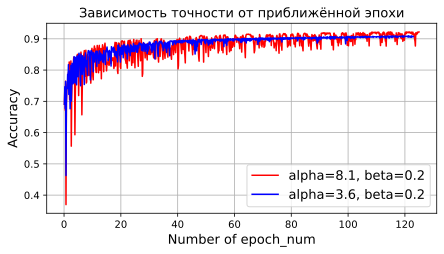

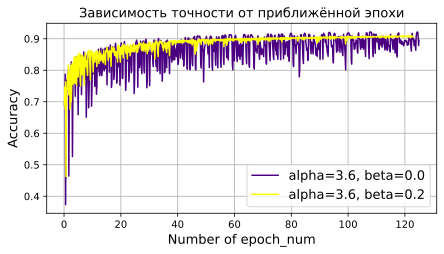

In [ ]:
plot_sgd_accuracy_iter([history9, history7], ['red', 'blue'], ['alpha=8.1, beta=0.2', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_accuracy_iter_alpha.pdf')
plot_sgd_accuracy_iter([history8, history7], ['indigo', 'yellow'], ['alpha=3.6, beta=0.0', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_accuracy_iter_beta.pdf')

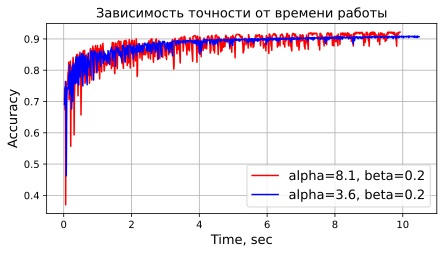

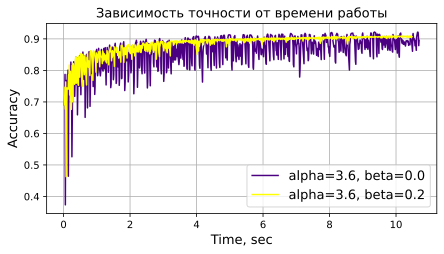

In [ ]:
plot_accuracy_time([history9, history7], ['red', 'blue'], ['alpha=8.1, beta=0.2', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_accuracy_time_alpha.pdf')
plot_accuracy_time([history8, history7], ['indigo', 'yellow'], ['alpha=3.6, beta=0.0', 'alpha=3.6, beta=0.2'])
plt.savefig('sgd_accuracy_time_beta.pdf')

In [ ]:
w_unif = 2*np.random.random(X_train.shape[1]) - 1
model = SGDClassifier(loss_function='binary_logistic', batch_size = 5000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history13 = model.fit(X_train, y_train.values, trace=True, w_0=w_unif, log_freq=0.1)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.8739355912670466

In [ ]:
w_norm = 2*np.random.randn(X_train.shape[1]) - 1
model = SGDClassifier(loss_function='binary_logistic', batch_size = 5000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history14 = model.fit(X_train, y_train.values, trace=True, w_0=w_norm, log_freq=0.1)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.8134963826109226

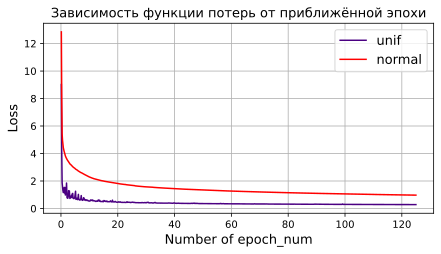

In [ ]:
plot_sgd_loss_iter([history13, history14], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('sgd_loss_iter_unif.pdf')

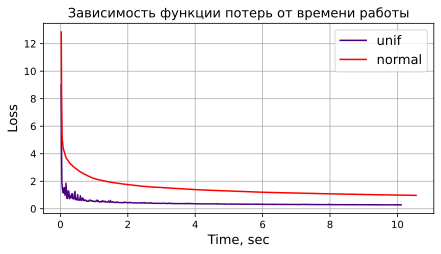

In [ ]:
plot_loss_time([history13, history14], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('sgd_loss_time_unif.pdf')

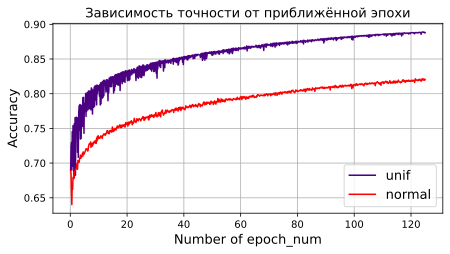

In [ ]:
plot_sgd_accuracy_iter([history13, history14], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('sgd_accuracy_iter_unif.pdf')

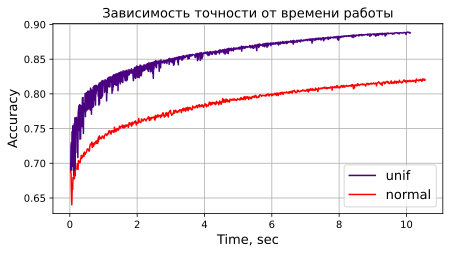

In [ ]:
plot_accuracy_time([history13, history14], ['indigo', 'red'], ['unif', 'normal'])
plt.savefig('sgd_accuracy_time_unif.pdf')

In [ ]:
model = SGDClassifier(loss_function='binary_logistic', batch_size = 5000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history15 = model.fit(X_train, y_train.values, trace=True, log_freq=1)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.8952557782188361

In [ ]:
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
history16 = model.fit(X_train, y_train.values, trace=True, log_freq=0.002)
y_pred = model.predict(X_val)
np.mean(y_val.values == y_pred)

0.8826429348869966

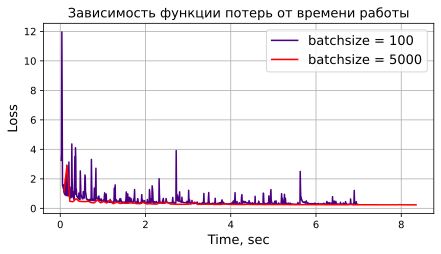

In [ ]:
plot_loss_time([history16, history15], ['indigo', 'red'], ['batchsize = 100', 'batchsize = 5000'])
plt.savefig('sgd_loss_time_batchsize.pdf')

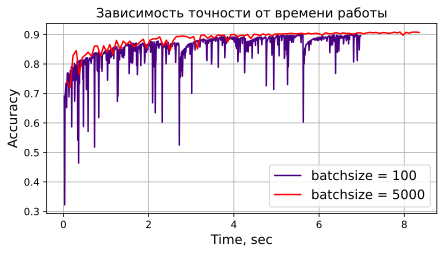

In [ ]:
plot_accuracy_time([history16, history15], ['indigo', 'red'], ['batchsize = 100', 'batchsize = 5000'])
plt.savefig('sgd_accuracy_time_batchsize.pdf')

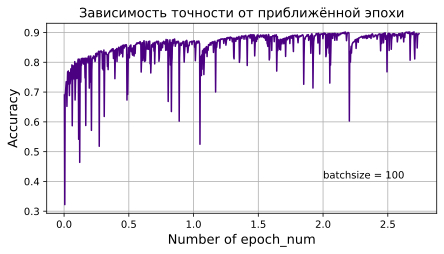

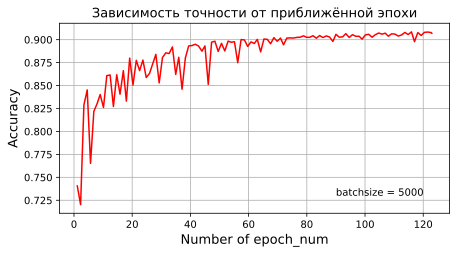

In [ ]:
plot_sgd_accuracy_iter([history16], 'indigo', 'batchsize = 100', None, 2.0, [0.41, 0.4])
plt.savefig('sgd_accuracy_iter_batchsize100.pdf')
plot_sgd_accuracy_iter([history15], 'red', 'batchsize = 5000', None, 90, [0.73, 0.4])
plt.savefig('sgd_accuracy_iter_batchsize5000.pdf')

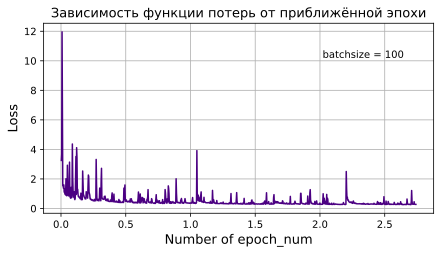

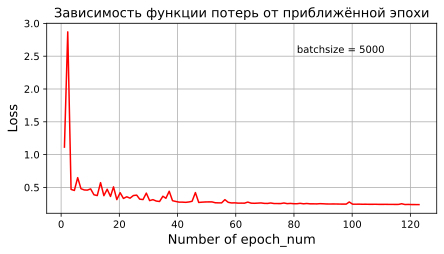

In [ ]:
plot_sgd_loss_iter([history16], 'indigo', 'batchsize = 100', None, 2.02, [10.2, 0.4])
plt.savefig('sgd_loss_iter_batchsize100.pdf')
plot_sgd_loss_iter([history15], 'red', 'batchsize = 5000', None, 81, [2.55, 0.4])
plt.savefig('sgd_loss_iter_batchsize5000.pdf')

## Сравнение GD и SGD

In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.8826429348869966
CPU times: user 4.87 s, sys: 40.1 ms, total: 4.91 s
Wall time: 4.91 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 1000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.8944234586081055
CPU times: user 5.12 s, sys: 53.5 ms, total: 5.17 s
Wall time: 5.18 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 10000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.8954478519751584
CPU times: user 11.7 s, sys: 220 ms, total: 11.9 s
Wall time: 11.9 s


In [ ]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.8957679749023625
CPU times: user 8.99 s, sys: 53.7 ms, total: 9.04 s
Wall time: 9.04 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.8770087713682054
CPU times: user 4.58 s, sys: 16.1 ms, total: 4.6 s
Wall time: 4.59 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 1000, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.9041551955951085
CPU times: user 5.43 s, sys: 50.5 ms, total: 5.48 s
Wall time: 5.48 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 10000, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train, y_train.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.9023625072027659
CPU times: user 13 s, sys: 292 ms, total: 13.3 s
Wall time: 13.3 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 10000, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=5000, l2_coef=0.0)
model.fit(X_train, y_train.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.9091491132594917
CPU times: user 1min 5s, sys: 1.38 s, total: 1min 6s
Wall time: 1min 6s


In [ ]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.9036429989115821
CPU times: user 9.88 s, sys: 47.7 ms, total: 9.92 s
Wall time: 9.92 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=5000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.9067802035981817
CPU times: user 23.6 s, sys: 215 ms, total: 23.8 s
Wall time: 23.8 s


## Lemmatization

In [12]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet

In [13]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
wr_net = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [16]:
train_text = []
for text in train['comment_text'].values:
    train_text += [" ".join([wr_net.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])]

In [17]:
test_text = []
for text in test['comment_text'].values:
    test_text += [' '.join([wr_net.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])]

In [18]:
count_vec = CountVectorizer(min_df=1e-3)

X_train_lem = count_vec.fit_transform(train_text)
X_test_lem = count_vec.transform(test_text)

In [19]:
X_train_lem

<52061x3203 sparse matrix of type '<class 'numpy.int64'>'
	with 1744226 stored elements in Compressed Sparse Row format>

In [20]:
w0_train = csr_matrix(np.ones(X_train_lem.shape[0])).T
w0_test = csr_matrix(np.ones(X_test_lem.shape[0])).T

X_train_lem = hstack((X_train_lem, w0_train))
X_test_lem = hstack((X_test_lem, w0_test))
X_train_lem

<52061x3204 sparse matrix of type '<class 'numpy.float64'>'
	with 1796287 stored elements in COOrdinate format>

In [21]:
X_train_lem, X_val_lem, y_train_lem, y_val_lem = train_test_split(X_train_lem, y_train, test_size=0.3, random_state=10)

In [24]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
start_time = time.time()
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val_lem.values == y_pred), time.time() - start_time)

0.8985850566617581 10.02407693862915
CPU times: user 9.91 s, sys: 70.5 ms, total: 9.98 s
Wall time: 10 s


In [25]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.8976887124655868
CPU times: user 8.63 s, sys: 69.7 ms, total: 8.7 s
Wall time: 8.69 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 10000, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.901978359690121
CPU times: user 11.4 s, sys: 235 ms, total: 11.7 s
Wall time: 11.7 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.8840514757666944
CPU times: user 4.38 s, sys: 31.5 ms, total: 4.41 s
Wall time: 4.4 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.8872527050387349
CPU times: user 4.37 s, sys: 31.4 ms, total: 4.41 s
Wall time: 4.42 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 10000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.8992253025161662
CPU times: user 11.4 s, sys: 232 ms, total: 11.6 s
Wall time: 11.7 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 10000, step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=5000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.911710096677124
CPU times: user 37.9 s, sys: 791 ms, total: 38.7 s
Wall time: 38.5 s


## BagOfWords vs Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf = TfidfVectorizer(min_df=1e-3)

In [ ]:
X_train_tf = tf_idf.fit_transform(train['comment_text'])
X_test_tf = tf_idf.transform(test['comment_text'])
X_train_tf

<52061x3736 sparse matrix of type '<class 'numpy.float64'>'
	with 1795438 stored elements in Compressed Sparse Row format>

In [ ]:
w0_train = csr_matrix(np.ones(X_train_tf.shape[0])).T
w0_test = csr_matrix(np.ones(X_test_tf.shape[0])).T

X_train_tf = hstack((X_train_tf, w0_train))
X_test_tf = hstack((X_test_tf, w0_test))
X_train_tf

<52061x3737 sparse matrix of type '<class 'numpy.float64'>'
	with 1847499 stored elements in COOrdinate format>

In [ ]:
X_train_lem_tf = tf_idf.fit_transform(train_text)
X_test_lem_tf = tf_idf.transform(test_text)

w0_train = csr_matrix(np.ones(X_train_lem_tf.shape[0])).T
w0_test = csr_matrix(np.ones(X_test_lem_tf.shape[0])).T

X_train_lem_tf = hstack((X_train_lem_tf, w0_train))
X_test_lem_tf = hstack((X_test_lem_tf, w0_test))
X_train_lem_tf

<52061x3204 sparse matrix of type '<class 'numpy.float64'>'
	with 1796287 stored elements in COOrdinate format>

In [ ]:
X_train_tf_tr, X_val_tf, y_train_tf_tr, y_val_tf = train_test_split(X_train_tf, y_train, test_size=0.3, random_state=10)
X_train_lem_tf_tr, X_val_lem_tf, y_train_lem_tf_tr, y_val_lem_tf = train_test_split(X_train_lem_tf, y_train, test_size=0.3, random_state=10)

### GD

In [ ]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.9036429989115821
CPU times: user 11.1 s, sys: 231 ms, total: 11.4 s
Wall time: 11.4 s


In [ ]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tf_tr, y_train_tr, trace=False)
y_pred = model.predict(X_val_tf)
print(np.mean(y_val_tf.values == y_pred))

0.8703502144823613
CPU times: user 10.9 s, sys: 232 ms, total: 11.1 s
Wall time: 11.2 s


In [ ]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.8985850566617581
CPU times: user 8.68 s, sys: 39.6 ms, total: 8.72 s
Wall time: 8.72 s


In [ ]:
%%time
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem_tf_tr, y_train_lem_tf_tr.values, trace=False)
y_pred = model.predict(X_val_lem_tf)
print(np.mean(y_val.values == y_pred))

0.8756642550739484
CPU times: user 8.91 s, sys: 43.4 ms, total: 8.95 s
Wall time: 8.95 s


### SGD

In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tr, y_train_tr.values, trace=False)
y_pred = model.predict(X_val)
print(np.mean(y_val.values == y_pred))

0.8826429348869966
CPU times: user 4.49 s, sys: 48.1 ms, total: 4.54 s
Wall time: 4.53 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_tf_tr, y_train_tf_tr.values, trace=False)
y_pred = model.predict(X_val_tf)
print(np.mean(y_val.values == y_pred))

0.8471092899673475
CPU times: user 4.49 s, sys: 27.3 ms, total: 4.52 s
Wall time: 4.51 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
print(np.mean(y_val.values == y_pred))

0.8872527050387349
CPU times: user 4.42 s, sys: 25.3 ms, total: 4.44 s
Wall time: 4.44 s


In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 100, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem_tf_tr, y_train_lem_tf_tr.values, trace=False)
y_pred = model.predict(X_val_lem_tf)
print(np.mean(y_val.values == y_pred))

0.8537038222677508
CPU times: user 4.57 s, sys: 25 ms, total: 4.59 s
Wall time: 4.59 s


### min_df, max_df


In [ ]:
max_df = np.logspace(-3, 0, 20)
for m in max_df:
    count_vec = CountVectorizer(max_df = m)

    X_train_lem = count_vec.fit_transform(train_text)
    #X_test_lem = count_vec.transform(test_text)

    w0_train = csr_matrix(np.ones(X_train_lem.shape[0])).T
    #w0_test = csr_matrix(np.ones(X_test_lem.shape[0])).T

    X_train_lem = hstack((X_train_lem, w0_train))
    #X_test_lem = hstack((X_test_lem, w0_test))
    X_train_lem, X_val_lem, y_train_lem, y_val_lem = train_test_split(X_train_lem, y_train, test_size=0.3, random_state=10)

    start_time = time.time()
    model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
    model.fit(X_train_lem, y_train_lem.values, trace=False)
    y_pred = model.predict(X_val_lem)
    accuracy = np.mean(y_val_lem.values == y_pred)
    print(f'max_df: {m} shape: {X_train_lem.shape} accuracy: {accuracy} time: {time.time() - start_time}')

max_df: 0.001 shape: (36442, 75136) accuracy: 0.7144503489339906 time: 8.091020822525024
max_df: 0.0014384498882876629 shape: (36442, 75803) accuracy: 0.73180101158845 time: 8.473847389221191
max_df: 0.00206913808111479 shape: (36442, 76393) accuracy: 0.7522888789295089 time: 8.700866937637329
max_df: 0.002976351441631319 shape: (36442, 76854) accuracy: 0.768743197387797 time: 8.918874979019165
max_df: 0.004281332398719396 shape: (36442, 77201) accuracy: 0.7910237531211985 time: 9.283332824707031
max_df: 0.006158482110660267 shape: (36442, 77511) accuracy: 0.8108713746078494 time: 9.76391315460205
max_df: 0.008858667904100823 shape: (36442, 77730) accuracy: 0.8323836353159614 time: 10.111038208007812
max_df: 0.012742749857031334 shape: (36442, 77906) accuracy: 0.849286125872335 time: 10.873297691345215
max_df: 0.018329807108324356 shape: (36442, 78019) accuracy: 0.8649721493053333 time: 11.175816059112549
max_df: 0.026366508987303583 shape: (36442, 78115) accuracy: 0.8787374351751073 t

In [ ]:
max_df = np.logspace(-1, 0, 20)[:7]
for m in max_df:
    count_vec = CountVectorizer(max_df = m)

    X_train_lem = count_vec.fit_transform(train_text)
    #X_test_lem = count_vec.transform(test_text)

    w0_train = csr_matrix(np.ones(X_train_lem.shape[0])).T
    #w0_test = csr_matrix(np.ones(X_test_lem.shape[0])).T

    X_train_lem = hstack((X_train_lem, w0_train))
    #X_test_lem = hstack((X_test_lem, w0_test))
    X_train_lem, X_val_lem, y_train_lem, y_val_lem = train_test_split(X_train_lem, y_train, test_size=0.3, random_state=10)

    start_time = time.time()
    model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
    model.fit(X_train_lem, y_train_lem.values, trace=False)
    y_pred = model.predict(X_val_lem)
    accuracy = np.mean(y_val.values == y_pred)
    print(f'max_df: {m} shape: {X_train_lem.shape} accuracy: {accuracy} time: {time.time() - start_time}')

max_df: 0.1 shape: (36442, 78282) accuracy: 0.9017862859337986 time: 14.875627517700195
max_df: 0.11288378916846889 shape: (36442, 78291) accuracy: 0.9024265317882066 time: 15.151988506317139
max_df: 0.12742749857031338 shape: (36442, 78298) accuracy: 0.9017862859337986 time: 15.901673316955566
max_df: 0.14384498882876628 shape: (36442, 78305) accuracy: 0.9025545809590882 time: 15.984505891799927
max_df: 0.16237767391887217 shape: (36442, 78312) accuracy: 0.9029387284717332 time: 16.388850927352905
max_df: 0.18329807108324356 shape: (36442, 78319) accuracy: 0.9031308022280555 time: 16.66138482093811
max_df: 0.20691380811147897 shape: (36442, 78321) accuracy: 0.9028747038862923 time: 16.969581604003906


In [ ]:
min_df = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for m in min_df:
    count_vec = CountVectorizer(min_df = m)

    X_train_lem = count_vec.fit_transform(train_text)
    #X_test_lem = count_vec.transform(test_text)

    w0_train = csr_matrix(np.ones(X_train_lem.shape[0])).T
    #w0_test = csr_matrix(np.ones(X_test_lem.shape[0])).T

    X_train_lem = hstack((X_train_lem, w0_train))
    #X_test_lem = hstack((X_test_lem, w0_test))
    X_train_lem, X_val_lem, y_train_lem, y_val_lem = train_test_split(X_train_lem, y_train, test_size=0.3, random_state=10)

    start_time = time.time()
    model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
    model.fit(X_train_lem, y_train_lem.values, trace=False)
    y_pred = model.predict(X_val_lem)
    accuracy = np.mean(y_val.values == y_pred)
    print(f'min_df: {m} shape: {X_train_lem.shape} accuracy: {accuracy} time: {time.time() - start_time}')

min_df: 0 shape: (36442, 78339) accuracy: 0.9097253345284589 time: 18.78732681274414
min_df: 1e-05 shape: (36442, 78339) accuracy: 0.9097253345284589 time: 18.684997081756592
min_df: 0.0001 shape: (36442, 12980) accuracy: 0.9099174082847814 time: 13.704018115997314
min_df: 0.001 shape: (36442, 3204) accuracy: 0.8985850566617581 time: 8.687533855438232
min_df: 0.01 shape: (36442, 547) accuracy: 0.8556885844164159 time: 7.278019905090332
min_df: 0.1 shape: (36442, 58) accuracy: 0.783468852039183 time: 5.47978663444519


In [ ]:
count_vec = CountVectorizer()

X_train_lem = count_vec.fit_transform(train_text)
#X_test_lem = count_vec.transform(test_text)

w0_train = csr_matrix(np.ones(X_train_lem.shape[0])).T
#w0_test = csr_matrix(np.ones(X_test_lem.shape[0])).T

X_train_lem = hstack((X_train_lem, w0_train))
#X_test_lem = hstack((X_test_lem, w0_test))
X_train_lem, X_val_lem, y_train_lem, y_val_lem = train_test_split(X_train_lem, y_train, test_size=0.3, random_state=10)

start_time = time.time()
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=1000, l2_coef=0.0)
model.fit(X_train_lem, y_train_lem.values, trace=False)
y_pred = model.predict(X_val_lem)
accuracy = np.mean(y_val.values == y_pred)
print(f'shape: {X_train_lem.shape} accuracy: {accuracy} time: {time.time() - start_time}')

shape: (36442, 78339) accuracy: 0.9097253345284589 time: 18.967824935913086


##Analysis of the best model

In [43]:
count_vec = CountVectorizer(min_df=1e-4)

X_train_lem = count_vec.fit_transform(train_text)
X_test_lem = count_vec.transform(test_text)

w0_train = csr_matrix(np.ones(X_train_lem.shape[0])).T
w0_test = csr_matrix(np.ones(X_test_lem.shape[0])).T

X_train_lem = hstack((X_train_lem, w0_train))
X_test_lem = hstack((X_test_lem, w0_test))

start_time = time.time()
model = GDClassifier(loss_function='binary_logistic', step_alpha=7.6,
                    step_beta=0.2, tolerance=1e-8, max_iter=5000, l2_coef=0.0)
model.fit(X_train_lem, y_train, trace=False)
y_pred = model.predict(X_test_lem)
accuracy = np.mean(y_test.values == y_pred)
print(f'shape: {X_train_lem.shape} accuracy: {accuracy} time: {time.time() - start_time}')

shape: (52061, 12980) accuracy: 0.8903559682723932 time: 138.85190725326538


In [44]:
((y_pred == y_test) & (y_pred == 1)).sum(), ((y_pred == y_test) & (y_pred == -1)).sum(), ((y_pred != y_test) & (y_pred == 1)).sum(), ((y_pred != y_test) & (y_pred == -1)).sum()

(5410, 12999, 1434, 833)

In [83]:
proba = model.predict_proba(X_test_lem)

In [51]:
5410 / (5410 + 1434), 5410 / (5410 + 833), 5410 / 6243

(0.7904734073641145, 0.8665705590261092, 0.8665705590261092)

In [49]:
(y_test == 1).sum(), (y_test == -1).sum()

(6243, 14433)

In [45]:
np.nonzero((y_test.values == 1) & (y_pred == -1))[0][:100]

array([  38,  237,  279,  294,  618,  655,  657,  743,  833, 1076, 1125,
       1294, 1304, 1317, 1361, 1373, 1387, 1595, 1637, 1831, 1909, 2042,
       2057, 2388, 2450, 2469, 2492, 2521, 2522, 2575, 2668, 2756, 3002,
       3071, 3134, 3173, 3210, 3246, 3273, 3305, 3342, 3549, 3663, 3671,
       3684, 3753, 3786, 3870, 3893, 4040, 4059, 4242, 4286, 4375, 4393,
       4513, 4598, 4626, 4701, 4795, 4893, 4954, 5039, 5122, 5158, 5212,
       5281, 5326, 5432, 5449, 5456, 5479, 5725, 5858, 5890, 5900, 5929,
       6078, 6149, 6202, 6231, 6305, 6483, 6491, 6557, 6627, 6663, 6669,
       6841, 6871, 7009, 7069, 7095, 7254, 7349, 7389, 7425, 7452, 7466,
       7525])

In [81]:
test_text[38], test_text[618], test_text[237], test_text[1294]

('how dare you vandalize that page about the hm beagle don t vandalize again demon',
 'shut up please this consensus be over',
 'if ya not still fu k u',
 'oh hey fuckface i can go all day buddy')

In [87]:
proba[1294]

array([0.59966838, 0.40033162])

In [48]:
np.nonzero((y_test.values == -1) & (y_pred == 1))[0][:100]

array([   1,   12,   17,   27,   33,   50,   56,   61,   78,   79,   87,
         99,  100,  102,  105,  110,  120,  148,  150,  152,  180,  196,
        232,  235,  241,  262,  269,  271,  282,  301,  310,  322,  328,
        329,  358,  373,  374,  392,  401,  423,  427,  439,  443,  445,
        460,  468,  545,  569,  578,  582,  599,  634,  636,  653,  661,
        665,  667,  675,  686,  694,  696,  697,  718,  730,  751,  773,
        774,  818,  822,  843,  850,  870,  878,  884,  886,  897,  907,
        909,  920,  926,  947,  965,  974,  993, 1004, 1022, 1048, 1062,
       1073, 1079, 1097, 1111, 1112, 1121, 1134, 1142, 1148, 1151, 1154,
       1161])

In [47]:
test_text[1], test_text[15993], test_text[27], test_text[148], test_text[235], test_text[392]

('dear god this site be horrible',
 'you be obviously nut just like this montel williams person i have never met a sane welshman',
 'i will burn you to hell if you revoke my talk page access',
 'you have my trust but trust me on this checkuser work will just eat you up burn you out and i guarantee you ll hate it seriously',
 'you can t just say that s crap and remove it without gain a consensus you already know this base on your block history',
 'agree it be stupid to say that any malfoy be albino')

In [72]:
test.iloc[945], y_test[945]

(Unnamed: 0                                                    945
 comment_text    your beat as hell stop getting rid of my cool ...
 Name: 945, dtype: object, 1)

In [ ]:
%%time
model = SGDClassifier(loss_function='binary_logistic', batch_size = 1000, step_alpha=3.6,
                    step_beta=0.2, tolerance=1e-7, max_iter=5000, l2_coef=0.0)
model.fit(X_train_lem, y_train.values, trace=False)
y_pred = model.predict(X_test_lem)
print(np.mean(y_test.values == y_pred))

0.8867285741923002
CPU times: user 33.4 s, sys: 182 ms, total: 33.6 s
Wall time: 33.5 s


In [ ]:
((y_pred == y_test) & (y_pred == 1)).sum(), ((y_pred == y_test) & (y_pred == -1)).sum(), ((y_pred != y_test) & (y_pred == 1)).sum(), ((y_pred != y_test) & (y_pred == -1)).sum()

(5282, 13052, 1381, 961)

In [89]:
5282 / (5282 + 1381), 5282 / (5282 + 961)

(0.7927360048026415, 0.846067595707192)

In [ ]:
y_test.shape

(20676,)